<a href="https://colab.research.google.com/github/Sulmon/Deep-Learning/blob/dev_branch/pet_breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#hide

! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [31]:
#for general functions
from fastbook import *

In [32]:
#for vision learners
from fastai.vision.all import *

In [33]:
path = untar_data(URLs.PETS)

In [34]:
Path.BASE_PATH = path
(path/'images').ls()

(#7393) [Path('images/pomeranian_149.jpg'),Path('images/Birman_97.jpg'),Path('images/japanese_chin_24.jpg'),Path('images/shiba_inu_152.jpg'),Path('images/Bombay_194.jpg'),Path('images/shiba_inu_92.jpg'),Path('images/Birman_141.jpg'),Path('images/saint_bernard_114.jpg'),Path('images/Ragdoll_25.jpg'),Path('images/leonberger_134.jpg')...]

7393 images in the path

In [35]:
#we create a DataBlock on which we will call a DataLoaders to create the data needed for our Learner

pets = DataBlock (
              blocks = (ImageBlock,CategoryBlock),
              get_items=get_image_files,
              splitter=RandomSplitter(seed=42),
              get_y =using_attr(RegexLabeller(r'(.+)_\d+.+'),'name'),
              item_tfms=Resize(460),
              batch_tfms=aug_transforms(size=224, min_scale=0.75)
)
dls = pets.dataloaders(path/'images')

*   item_tfms=Resize(460)
*   batch_tfms=aug_transforms(size=224, min_scale=0.75)

Both are used for presizing, which are  data augmentation techniques

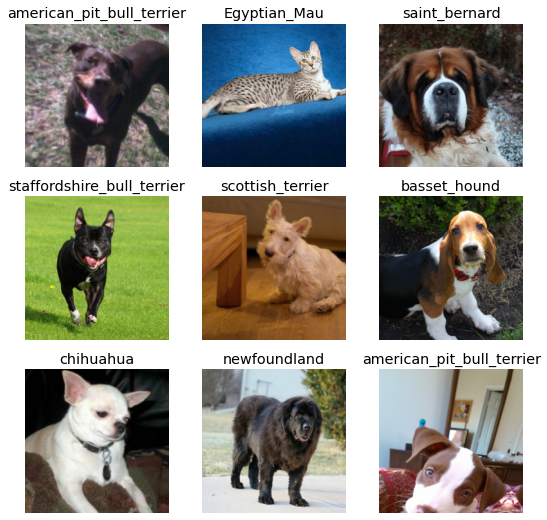

In [36]:
#checking  and debugging the DataBlock

dls.show_batch()

In [37]:
#we create a DataBlock on which we will call a DataLoaders to create the data needed for our Learner
#we can see what is really happening behing the scenes when dealing with DataBlocks


pets_check = DataBlock (
              blocks = (ImageBlock,CategoryBlock),
              get_items=get_image_files,
              splitter=RandomSplitter(seed=42),
              get_y =using_attr(RegexLabeller(r'(.+)_\d+.+'),'name'),
              item_tfms=Resize(460),
              batch_tfms=aug_transforms(size=224, min_scale=0.75)
)
pets_check.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_127.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=225x300
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_127.jpg
    applying partial gives
      pomeranian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(28)

Final sample: (PILImage mode=RGB size=225x300, TensorCategory(28))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_it

once we have our data in a satisfiable state we can  then proceed to create a minimal model our so called based model that we will use as benchmark for the rest of the other attempts

In [38]:
learner = vision_learner(dls, resnet34, metrics = error_rate)
learner.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.525391,0.330185,0.110284,01:20


epoch,train_loss,valid_loss,error_rate,time
0,0.515162,0.309900,0.103518,01:16
1,0.314513,0.249403,0.078484,01:15


Fast AI automatically recognizes that it is a case of multiclassfication and uses the cross entropy as loss function  which entails making use of the softmax function at the end instead of the sigmoid function(binary classification).  Cross entropy works even when our dependent variable has more than two categories and results in faster and more reliable training

In [39]:
# having a look in  the activations that are recieved by the softmax function gives us more insgights into how the cross-Entropy / softmax function works
# for this we can return one of our min-batche
x,y = dls.one_batch()

In [40]:
x

TensorImage([[[[ 1.5212e-01,  2.1439e-01,  2.2229e-01,  ..., -2.5663e-01, -3.3963e-01, -4.2798e-01],
               [ 2.0643e-01,  2.1251e-01,  2.0980e-01,  ..., -9.3198e-02, -1.4492e-01, -2.1643e-01],
               [ 1.8131e-01,  1.6582e-01,  1.7104e-01,  ...,  4.2938e-01,  3.6440e-01,  2.3444e-01],
               ...,
               [-3.7240e-01, -3.8709e-01, -6.2211e-01,  ..., -9.5939e-01, -1.1234e+00, -1.1455e+00],
               [-4.7376e-01, -4.9606e-01, -7.3929e-01,  ..., -9.4524e-01, -1.0339e+00, -1.2409e+00],
               [-3.0985e-01, -5.8968e-01, -5.4848e-01,  ..., -5.8743e-01, -9.4268e-01, -9.0616e-01]],

              [[ 1.1242e+00,  1.0718e+00,  1.0928e+00,  ..., -1.5519e-02, -5.9111e-02, -1.1654e-01],
               [ 1.0867e+00,  1.0716e+00,  1.0961e+00,  ...,  1.7834e-01,  1.3694e-01,  6.5988e-02],
               [ 1.0718e+00,  1.0668e+00,  1.0780e+00,  ...,  5.4183e-01,  5.1918e-01,  4.2348e-01],
               ...,
               [ 1.0445e-03,  8.0022e-03, -2.0930

In [41]:
y

TensorCategory([14, 13, 10, 22, 23, 30, 13, 25, 29, 24, 32,  3, 28, 23, 32,  4, 35, 12,  9, 24, 30, 10, 30, 18,  1, 28, 15, 32, 15,  5, 12,  3, 32, 33,  4,  4, 20, 34, 36, 14, 10, 19, 29, 25,  3, 35,
                17,  0, 19,  8, 21, 23, 18, 12,  7, 26,  0, 13, 26, 27,  9, 24, 15, 22], device='cuda:0')

What our DataBlock/ Data Loader  did



1.   Transform image into unit pixelmatrix
2.   use the regex and labelling function to assign each image a category
1.   Transformed images into tensors 
2.   Transformed  labels into scalar tensors--- categories
1.   assign to each image a category
2.   Bundled tensors into larger tensors --mini batches
1.   split the data into 2 training set and validation set

the random mini batch above shos us the tensor of a mini batch x = imagetensor and y= category tensor and we can see that our batch_size is 64, something that can be changed








In [42]:
preds,_ = learner.get_preds(dl=[(x,y)])
preds[0]

TensorBase([1.7740e-07, 3.7135e-06, 1.7610e-07, 3.8340e-08, 1.9565e-07, 1.4835e-06, 3.8234e-07, 2.2023e-07, 7.6488e-08, 2.0723e-07, 2.6277e-07, 2.6922e-08, 1.4658e-06, 1.0111e-05, 9.9871e-01,
            1.2116e-03, 2.0330e-06, 1.6901e-08, 9.3630e-07, 1.7246e-06, 4.6727e-06, 3.6987e-06, 9.6472e-08, 3.9161e-08, 1.7611e-06, 7.8200e-07, 1.1114e-06, 1.1131e-06, 6.8826e-08, 3.2309e-08,
            3.0015e-05, 5.2723e-07, 2.6488e-07, 1.7538e-07, 9.2080e-06, 4.1781e-07, 5.7579e-07])

In [43]:
#for each of the 64 elements of our tensors/images we have 37 predictions corresponding to the certainty with which we think one specific category corresponds to an image
preds.shape

torch.Size([64, 37])

In [44]:
# all the predictions/probability/activities sums up to 1 , the highest probability corresponds to our prediction
len(preds[0]),preds[0].sum()

(37, TensorBase(1.))

To transform the activations of our model into predictions like this, we used something called the softmax activation function.We can apply the sigmoid function to a single column of activations from a neural network, and get back a column of numbers between 0 and 1, so it's a very useful activation function for our final layer.Now think about what happens if we want to have more categories in our target (such as our 37 pet breeds).That means we'll need more activations than just a single column:we need an activation per category.Binary problems are a special case of classification problems, because the target can be treated as a single boolean value.binary problems can also be thought of in the context of the more general group of classifiers with any number of categories: in this case, we happen to have two categories. As we saw in the bear classifier, our neural net will return one activation per category.
Think of softmax as a generalisation of the sigmoid fot assign the probility to multiple column such that the sum of it should be 1
so our activations produce values for each category and the softmax function transforms it into a probabilty distribution function such that the sum=1.What does this function do in practice? Taking the exponential ensures all our numbers are positive, and then dividing by the sum ensures we are going to have a bunch of numbers that add up to 1.he exponential also has a nice property: if one of the numbers in our activations x is slightly bigger than the others, the exponential will amplify this (since it grows, well... exponentially), which means that in the softmax, that number will be closer to 1.

Softmax is the first part of the cross-entropy loss—the second part is log likelihood.


Additionally, we want to ensure our model is able to detect differences between small numbers. For example, consider the probabilities of .01 and .001. Indeed, those numbers are very close together—but in another sense, 0.01 is 10 times more confident than 0.001. By taking the log of our probabilities, we prevent these important differences from being ignored.


When we see it in that format, it looks a bit boring; but think about what this really means. It means that logarithms increase linearly when the underlying signal increases exponentially or multiplicatively.

the log likelihood tells punishes false predications and rewards good prediction
so the softmax function translate the activations into predictions and the log likelihood , increases the loss for bad predictions and reduces the loss for good predictions

We're calculating the loss from the column containing the correct label. Because there is only one "right" answer per example, we don't need to consider the other columns, because by the definition of softmax, they add up to 1 minus the activation corresponding to the correct label.

Taking the mean of the negative log of our probabilities (taking the mean of the loss column of our table) gives us the negative log likelihood loss, and that is what is used to perform optimze our predictions/weigths.

When we first take the softmax, and then the log likelihood of that, that combination is called cross-entropy loss. In PyTorch, this is available as nn.CrossEntropyLoss (which, in practice, actually does log_softmax and then nll_loss):


All PyTorch loss functions are provided in two forms, the class just shown above, and also a plain functional form, available in the F namespace


By default PyTorch loss functions take the mean of the loss of all items. You can use reduction='none' to disable that

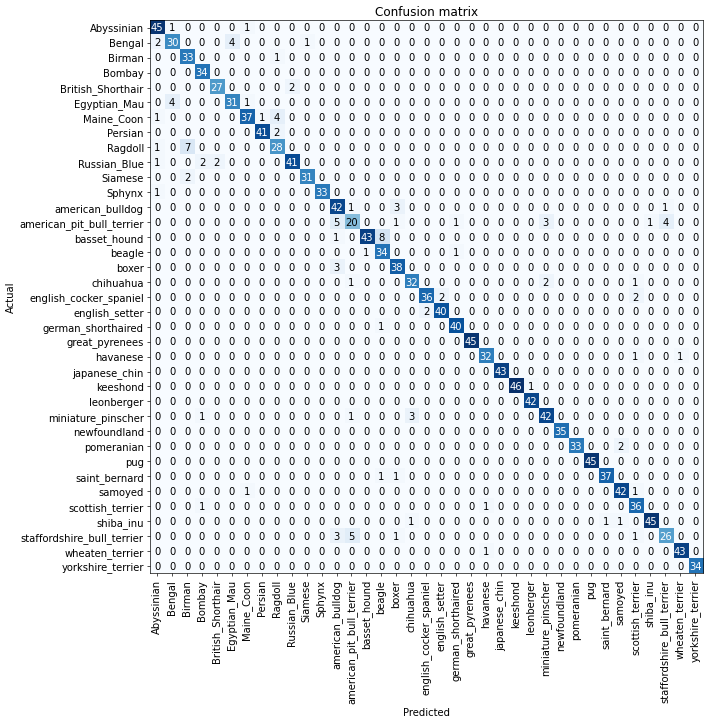

In [45]:
#use confusion matrix to check --- metrics != loss function!!
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize =(12,12), dpi=60)

In [46]:
#Because it's quite a lot we will use the most_confused method which will focus on the top n categories with the worst predictions
interp.most_confused(min_val=5)

[('basset_hound', 'beagle', 8),
 ('Ragdoll', 'Birman', 7),
 ('american_pit_bull_terrier', 'american_bulldog', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

In [47]:
#It might make sense to check those breeds to see if our model's mistake are "acceptable"
#when we google a bit we see that the mistake is indeed honest as the species looks quite alike

**Improving teh Model**


The first thing to set here is the Learning rate---HOW DO WE PICK A GOOD LEARNING RATE ?
- A too low learning rate => too many epoch, slow, possible overfitting
- A too high learning rate = > step so far that it totally overshoots the minimum loss and repeating that makes it go further and further not closer


In 2015 the researcher Leslie Smith came up with a brilliant idea, called the learning rate finder. His idea was to start with a very, very small learning rate, something so small that we would never expect it to be too big to handle. We use that for one mini-batch, find what the losses are afterwards, and then increase the learning rate by some percentage (e.g., doubling it each time). Then we do another mini-batch, track the loss, and double the learning rate again. We keep doing this until the loss gets worse, instead of better. This is the point where we know we have gone too far. We then select a learning rate a bit lower than this point

Technique,

go batch per batch and track the loss during the learning process, at each batch increase the learning rate by a little percentage. Continue untill the learning rate gets worse then choose the learning rate between where the minimum was achieved (min) and an order 10-1 before (steepest)

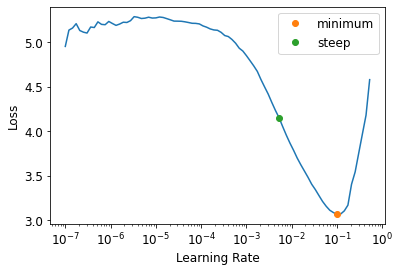

In [48]:
#The learning rate finder computes those points on the curve to help you
# - One order of magnitude less than where the minimum loss was achieved(/10)
# - The last point where the loss was clearly decreasing
learn  = vision_learner(dls,resnet34, metrics = error_rate)
lr_min, lr_steep = learn.lr_find(suggest_funcs = (minimum, steep))

In [49]:

print(f"Minimum/10:{lr_min:.2e}, steepest point: {lr_steep:.2e} ")

Minimum/10:1.00e-02, steepest point: 5.25e-03 


In [50]:
lr = (lr_min + lr_steep)/2
lr

0.0076240372844040396

In [51]:
# let's take a learning rate between the two numbers we just found so lr = 0.007521

learn = vision_learner(dls,resnet34, metrics = error_rate)
learn.fine_tune(2, base_lr=lr)


epoch,train_loss,valid_loss,error_rate,time
0,1.056991,0.454683,0.131935,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.814438,0.657148,0.182679,01:13
1,0.450750,0.275651,0.085250,01:15


Leslie Smith, was not part of some exclusive Silicon Valley lab, but was working as a naval researcher. All of this is to say: breakthrough work in deep learning absolutely does not require access to vast resources, elite teams, or advanced mathematical ideas. There is lots of work still to be done that requires just a bit of common sense, creativity, and tenacity.

**Unfreezing and Transfer Learning**

how transfer learning works. We saw that the basic idea is that a pretrained model, trained potentially on millions of data points (such as ImageNet), is fine-tuned for some other task. But what does this really mean?

We now know that a convolutional neural network consists of many linear layers with a nonlinear activation function between each pair, followed by one or more final linear layers with an activation function such as softmax at the very end
The final linear layer uses a matrix with enough columns such that the output size is the same as the number of classes in our model (assuming that we are doing classification).

This final linear layer is unlikely to be of any use for us when we are fine-tuning in a transfer learning setting, because it is specifically designed to classify the categories in the original pretraining dataset. So when we do transfer learning we remove it, throw it away, and replace it with a new linear layer with the correct number of outputs for our desired task (in this case, there would be 37 activations).


Our challenge when fine-tuning is to replace the random weights in our added linear layers with weights that correctly achieve our desired task (classifying pet breeds) without breaking the carefully pretrained weights and the other layers. There is actually a very simple trick to allow this to happen: tell the optimizer to only update the weights in those randomly added final layers. Don't change the weights in the rest of the neural network at all. This is called freezing those pretrained layers.

When we create a model from a pretrained network fastai automatically freezes all of the pretrained layers for us. When we call the fine_tune method fastai does two things:

Trains the randomly added layers for one epoch, with all other layers frozen
Unfreezes all of the layers, and trains them all for the number of epochs requested





In [52]:
learn.fine_tune?

In [53]:
#now we will replicate what fine_tune does manually
#1- it  randomly assigned weight to the last layer and trains the model for one epoch(in this case we choose 3)  with all the othe weights frozen
#fit_one_cycle is the suggested way to train the models without using fine_tune.It trains at a low learning rate, gradually increase it for the first section
#of training and then gradually decreases it again
learn = vision_learner(dls, resnet34, metrics= error_rate)
learn.fit_one_cycle(n_epoch = 3, lr_max=lr)

epoch,train_loss,valid_loss,error_rate,time
0,1.021846,0.711935,0.178620,01:09
1,0.682654,0.403264,0.110284,01:11
2,0.413092,0.298575,0.085927,01:09


In [54]:
#This trained the model with all the previous layers frozen so now we unfreeze them and retrain the model

learn.unfreeze()

SuggestedLRs(valley=0.00010964782268274575)

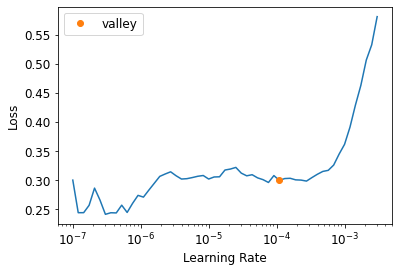

In [55]:
learn.lr_find()

In [56]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.289157,0.285741,0.085927,01:13
1,0.274664,0.266907,0.081867,01:15
2,0.237708,0.255261,0.080514,01:15
3,0.215924,0.250478,0.079838,01:13
4,0.213441,0.249717,0.078484,01:15
5,0.206101,0.247301,0.079161,01:14


 when we use different learning rates on different layers it is known as discriminative learning rates because the deepest layers might not need as much learning rate as the last ones.Therefore, fastai's default approach is to use discriminative learning rates. Like many good ideas in deep learning, it is extremely simple: use a lower learning rate for the early layers of the neural network, and a higher learning rate for the later layers (and especially the randomly added layers).The first value passed will be the learning rate in the earliest layer of the neural network, and the second value will be the learning rate in the final layer. The layers in between will have learning rates that are multiplicatively equidistant throughout that range.

In [57]:
learn = vision_learner(dls, resnet34, metrics= error_rate)
learn.fit_one_cycle(3,3e-3)
learn.unfreeze()
learn.fit_one_cycle(12,lr_max= slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.180803,0.312941,0.107578,01:12
1,0.511718,0.254282,0.085250,01:11
2,0.342139,0.227866,0.077808,01:10


epoch,train_loss,valid_loss,error_rate,time
0,0.247552,0.218557,0.075101,01:15
1,0.248009,0.214856,0.077131,01:14
2,0.231883,0.210185,0.071719,01:17
3,0.217259,0.213446,0.071719,01:16
4,0.190865,0.216771,0.069012,01:15
5,0.169610,0.204897,0.070365,01:16
6,0.149725,0.203243,0.069012,01:15
7,0.144988,0.208347,0.069012,01:15
8,0.136014,0.204907,0.068336,01:15
9,0.131098,0.202390,0.066306,01:15


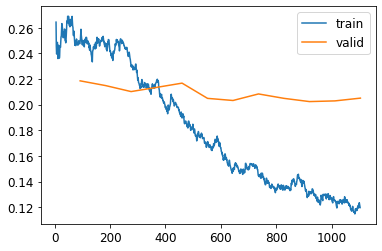

In [58]:
learn.recorder.plot_loss()

As you can see, the training loss keeps getting better and better. But notice that eventually the validation loss improvement slows, and sometimes even gets worse! This is the point at which the model is starting to over fit.In the end what matters is your accuracy, or more generally your chosen metrics, not the loss. The loss is just the function we've given the computer to help us to optimize.

So if the training loss keeps improving and the validation loss somehow start getting worse it might be a sign of overfitting , this doesn't necessarily mean that the predictions are getting wrong as the loss is just a function to optimize our weights.

Another decision you have to make when training the model is for how long to train for. We'll consider that next.Often you will find that you are limited by time, rather than generalization and accuracy, when choosing how many epochs to train for. So your first approach to training should be to simply pick a number of epochs that will train in the amount of time that you are happy to wait for. Then look at the training and validation loss plots, as shown above, and in particular your metrics, and if you see that they are still getting better even in your final epochs, then you know that you have not trained for too long.Therefore, if you find that you have overfit, what you should actually do is retrain your model from scratch, and this time select a total number of epochs based on where your previous best results were found.f you have the time to train for more epochs, you may want to instead use that time to train more parameters—that is, use a deeper architecture.

In general, a model with more parameters can model your data more accurately. (There are lots and lots of caveats to this generalization, and it depends on the specifics of the architectures you are using, but it is a reasonable rule of thumb for now.)

This is why, in practice, architectures tend to come in a small number of variants. For instance, the ResNet architecture that we are using in this chapter comes in variants with 18, 34, 50, 101, and 152 layer, pretrained on ImageNet.A larger (more layers and parameters; sometimes described as the "capacity" of a model) version of a ResNet will always be able to give us a better training loss, but it can suffer more from overfitting, because it has more parameters to overfit with.

However, using a deeper model is going to require more GPU RAM, so you may need to lower the size of your batches to avoid an out-of-memory error. This happens when you try to fit too much inside your GPU and looks like.You can pass the batch size you want to the call creating your DataLoaders with bs=.

he other downside of deeper architectures is that they take quite a bit longer to train. One technique that can speed things up a lot is mixed-precision training. This refers to using less-precise numbers.numbers (half-precision floating point, also called fp16) where possible during training.

In [59]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics = error_rate).to_fp16()
learn.fine_tune(6,freeze_epochs=3)

#

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.294549,0.298114,0.100812,01:21
1,0.571815,0.274433,0.092016,01:07
2,0.439076,0.249195,0.081191,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.271717,0.259800,0.085250,01:11
1,0.301181,0.375546,0.113667,01:08
2,0.264487,0.320201,0.084574,01:10
3,0.152605,0.237696,0.077808,01:08
4,0.087526,0.200792,0.060217,01:11
5,0.060718,0.195252,0.059540,01:10


bigger models aren't necessarily better models for your particular case! Make sure you try small models before you start scaling up.

preds[1]